In [320]:
from master_thesis.src import utils, data
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

import scipy.stats as st

import matplotlib.pyplot as plt

In [321]:
#full = pd.read_csv(utils.DATA / 'combined_textCrawling.tsv', sep='\t')
full = utils.get_raw_df()

Shared columns: {'avgTimeOnPagePerWordcount_percentile', 'dpaGuid', 'date', 'nr_tokens_publisher', 'prozentDpa', 'pageviews_percentile', 'pageviews', 'avgTimeOnPage_percentile', 'avgTimeOnPage', 'rubric', 'exits', 'titel', 'bounces', 'zeilen', 'teaser', 'publisher', 'entrances', 'pagePath', 'timeOnPage', 'prozentVerlag', 'category', 'article_text', 'avgTimeOnPagePerWordcount', 'nr_tokens_text'}
Shape of raw df: (90139, 24)


In [322]:
full.shape

(90139, 24)

In [323]:
full.tail()

,avgTimeOnPagePerWordcount_percentile,dpaGuid,date,nr_tokens_publisher,prozentDpa,pageviews_percentile,pageviews,avgTimeOnPage_percentile,avgTimeOnPage,rubric,...,teaser,publisher,entrances,pagePath,timeOnPage,prozentVerlag,category,article_text,avgTimeOnPagePerWordcount,nr_tokens_text
articleId,,,,,,,,,,,,,,,,,,,,,
NOZ_2138313,22.018453,NaN,NaN,649,NaN,44.415280,339,54.817744,176.402439,lokalsport-dk,...,Hildesheim. Der SV Atlas Delmenhorst schlägt n...,NOZ,230,NaN,14465.0,NaN,sport,Fußball-Regionalliga 2020/21: SV Atlas Delmenh...,0.271807,649
NOZ_2138327,87.892010,NaN,NaN,235,NaN,1.429416,83,67.548405,198.072727,politik,...,Osnabrück. Einen Rechtsanspruch auf 24 Tage Ho...,NOZ,20,NaN,10894.0,NaN,deutschland-und-welt,Anspruch auf Arbeit im Homeoffice: Wo ist das ...,0.842863,235
NOZ_2138333,78.811017,NaN,NaN,175,NaN,55.307472,474,17.262067,114.608491,vermischtes,...,Sankt Pölten/Innsbruck . Heftiger Sturm hat in...,NOZ,231,NaN,24297.0,NaN,deutschland-und-welt,Tragödie in Österreich: Auf Wanderung mit Groß...,0.654906,175
NOZ_2138370,33.256068,NaN,NaN,591,NaN,12.674984,141,62.576129,189.042254,niedersachsen,...,Hannover. In Niedersachsen stecken sich wieder...,NOZ,45,NaN,13422.0,NaN,deutschland-und-welt,Gesundheit: Kreis Vechta überschreitet Corona-...,0.319868,591
NOZ_2138389,5.899464,NaN,NaN,979,NaN,23.330834,193,50.222707,169.140496,melle,...,Melle. Außergewöhnlich und einzigartig war die...,NOZ,45,NaN,20466.0,NaN,lokales,"""Melle hält zusammen"": Meller Vier-Stunden-Liv...",0.172769,979


In [325]:
full.publisher.value_counts()

NOZ    36383
SZ     32272
TV     21484
Name: publisher, dtype: int64

In [326]:
# get one hot encoding of publisher
publisher_one_hot = pd.get_dummies(full['publisher'])
publisher_one_hot.to_csv(utils.OUTPUT / f'meta_file_publisher.csv', index=True) # save to file

In [327]:
publisher_one_hot

,NOZ,SZ,TV
articleId,,,
SZ_16591,0,1,0
SZ_16595,0,1,0
SZ_16723,0,1,0
SZ_17146,0,1,0
SZ_17184,0,1,0
...,...,...,...
NOZ_2138313,1,0,0
NOZ_2138327,1,0,0
NOZ_2138333,1,0,0


In [329]:
import collections

In [12]:
#def get_category_mean(df, columns):
#    category_mean = collections.defaultdict(dict)
#    for cat in categories:
#        tmp = df[df.category == cat]
#        if len(tmp) > 0:
#            for col in columns:
#                mean = np.mean(tmp[col]).round(3)
#                category_mean[cat][col] = mean
#            category_mean[cat]["count"] = len(tmp)
#    return category_mean

In [330]:
def get_publisher_mean(df, columns):
    publisher_mean = collections.defaultdict(dict)
    for publ in full.publisher.value_counts().keys():
        tmp = df[df.publisher == publ]
        if len(tmp) > 0:
            for col in columns:
                mean = np.mean(tmp[col]).round(3)
                publisher_mean[publ][col] = mean
            publisher_mean[publ]["count"] = len(tmp)
    return publisher_mean

In [332]:
col_list = ['pageviews', 'exits', 'nr_tokens_text', 'zeilen', 'timeOnPage', 'avgTimeOnPage', 'avgTimeOnPagePerWordcount']#, 'stickiness']


In [333]:
pd.DataFrame.from_dict(get_publisher_mean(df = full, columns = col_list), orient='index')

,pageviews,exits,nr_tokens_text,zeilen,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,count
NOZ,1298.704,903.344,461.898,41.744,71388.487,185.851,0.519,36383
SZ,1147.325,646.061,468.130,47.858,23522.356,57.202,0.178,32272
TV,1353.442,620.039,490.930,45.009,32955.279,51.348,0.164,21484


In [336]:
# auffallend ist, dass die Aufenthaltsdauer bei NOZ im Durchschnitt dreimal so groß ist... Warum?
# das ist auch noch der Fall, wenn man nur Artikel mit pageviews-exits >= 500 oder mindest Tokenzahl nimmt!
# Also eher kein Kaffeetrink-Problem

In [337]:
df = full[(full.pageviews - full.exits) >= 500]
df = df[df.nr_tokens_text >= 700]

pd.DataFrame.from_dict(get_publisher_mean(df = df, columns = col_list), orient='index')

,pageviews,exits,nr_tokens_text,zeilen,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,count
NOZ,6597.214,4879.000,1020.425,100.475,396439.552,232.460,0.249,1300
SZ,4303.661,2368.585,904.696,97.556,80523.946,48.536,0.056,1023
TV,5432.923,2409.909,917.773,80.964,129272.634,56.825,0.064,1071


In [346]:
full = utils.get_raw_df()
df = full[full.nr_tokens_text >= 100]
df = df[df.nr_tokens_text <= 3000]
print(df.shape)

Shared columns: {'avgTimeOnPagePerWordcount_percentile', 'dpaGuid', 'date', 'nr_tokens_publisher', 'prozentDpa', 'pageviews_percentile', 'pageviews', 'avgTimeOnPage_percentile', 'avgTimeOnPage', 'rubric', 'exits', 'titel', 'bounces', 'zeilen', 'teaser', 'publisher', 'entrances', 'pagePath', 'timeOnPage', 'prozentVerlag', 'category', 'article_text', 'avgTimeOnPagePerWordcount', 'nr_tokens_text'}
Shape of raw df: (90139, 24)
(87233, 24)


In [349]:
NOZ = df[df.publisher == "NOZ"]
SZ = df[df.publisher == "SZ"]
TV = df[df.publisher == "TV"]

In [350]:
NOZ.sort_values("avgTimeOnPage", ascending= False).head(5)

,avgTimeOnPagePerWordcount_percentile,dpaGuid,date,nr_tokens_publisher,prozentDpa,pageviews_percentile,pageviews,avgTimeOnPage_percentile,avgTimeOnPage,rubric,...,teaser,publisher,entrances,pagePath,timeOnPage,prozentVerlag,category,article_text,avgTimeOnPagePerWordcount,nr_tokens_text
articleId,,,,,,,,,,,,,,,,,,,,,
NOZ_406939,99.068267,NaN,NaN,1806,NaN,80.334742,1522,100.000000,3761.362903,lathen,...,"„Du wirst überleben und erzählen, was man mit ...",NOZ,1407,NaN,466409.0,NaN,lokales,„Ich war schon auf dem Weg zur Gaskammer“ „Du ...,2.082704,1806
NOZ_739925,90.664485,NaN,NaN,2677,NaN,69.023271,830,99.997727,2520.174603,medien,...,Berlin. Ein Gespräch mit RBB-Moderator Jörg Th...,NOZ,768,NaN,158771.0,NaN,deutschland-und-welt,Fiese Fragen an den Moderator: Jörg Thadeusz: ...,0.941417,2677
NOZ_448761,99.509136,NaN,NaN,881,NaN,85.544496,2157,99.995455,2430.642857,osnabrueck,...,"Osnabrück. Ein Postschalter, an dem nebenbei n...",NOZ,2065,NaN,238203.0,NaN,lokales,Inhaber von Postfiliale enttäuscht: Zierfische...,2.758959,881
NOZ_515048,93.532406,NaN,NaN,2202,NaN,93.722162,4623,99.993182,2396.707547,medien,...,Osnabrück. Seit mehr als dreißig Jahren prägt ...,NOZ,4331,NaN,762153.0,NaN,deutschland-und-welt,Gitarrist und Sänger im Interview: Farin Urlau...,1.088423,2202
NOZ_88793,92.321153,NaN,NaN,2308,NaN,78.987138,1399,99.990910,2360.616822,medien,...,Kassel. Beim TV-Sender Vox bessert er als Hund...,NOZ,1296,NaN,252586.0,NaN,deutschland-und-welt,„Das müssen Sie Ihren Hund fragen!“: Hundeprof...,1.022798,2308


In [351]:
SZ.sort_values("avgTimeOnPage", ascending= False).head(5)

,avgTimeOnPagePerWordcount_percentile,dpaGuid,date,nr_tokens_publisher,prozentDpa,pageviews_percentile,pageviews,avgTimeOnPage_percentile,avgTimeOnPage,rubric,...,teaser,publisher,entrances,pagePath,timeOnPage,prozentVerlag,category,article_text,avgTimeOnPagePerWordcount,nr_tokens_text
articleId,,,,,,,,,,,,,,,,,,,,,
SZ_51850689,94.558751,NaN,NaN,779,NaN,46.960213,246,100.000000,425.672897,saar-kultur,...,"Völklingen Weniger Stellwände, mehr Arbeiterku...",SZ,139,NaN,45547.0,NaN,saarland,"Völklingen Weniger Stellwände, mehr Arbeiterku...",0.546435,779
SZ_960209,99.965915,NaN,NaN,161,NaN,33.189762,175,99.996901,394.954198,themen,...,Berlin. Bei einem Anschlag von Aufständischen ...,SZ,44,NaN,51739.0,NaN,politik,Berlin. Bei einem Anschlag von Aufständischen ...,2.453132,161
SZ_51985807,92.306024,NaN,NaN,726,NaN,47.841782,252,99.993803,321.563830,saar-kultur,...,Saarbrücken „Rose Royal“ heißt der neue Kurzro...,SZ,155,NaN,30227.0,NaN,saarland,Saarbrücken „Rose Royal“ heißt der neue Kurzro...,0.442925,726
SZ_53273755,75.368741,NaN,NaN,1547,NaN,3.693604,91,99.990704,318.465753,NaN,...,München Franz Beckenbauer wird an diesem Freit...,SZ,5,NaN,23248.0,NaN,sport,München Franz Beckenbauer wird an diesem Freit...,0.205860,1547
SZ_52509387,97.288671,NaN,NaN,410,NaN,29.595315,163,99.987605,311.563636,meinung,...,Die Reaktion des Nato-Generalsekretärs ist ein...,SZ,100,NaN,17136.0,NaN,nachrichten,Die Reaktion des Nato-Generalsekretärs ist ein...,0.759911,410


## using JUST publisher, textlength or category/rubric matrix as features, NOT the text itself

In [372]:
full = utils.get_raw_df()
full.reset_index(inplace=True)
df = full[full.nr_tokens_text >= 100]
df = df[df.nr_tokens_text <= 3000]

Shared columns: {'avgTimeOnPagePerWordcount_percentile', 'dpaGuid', 'date', 'nr_tokens_publisher', 'prozentDpa', 'pageviews_percentile', 'pageviews', 'avgTimeOnPage_percentile', 'avgTimeOnPage', 'rubric', 'exits', 'titel', 'bounces', 'zeilen', 'teaser', 'publisher', 'entrances', 'pagePath', 'timeOnPage', 'prozentVerlag', 'category', 'article_text', 'avgTimeOnPagePerWordcount', 'nr_tokens_text'}
Shape of raw df: (90139, 24)


In [373]:
#df = df[df.publisher == "SZ"]
#df = df[df.publisher == "TV"]
df = df[df.publisher == "NOZ"]

In [374]:
df_train, df_dev, df_test = data.create_train_dev_test(df, random_seed = 123)

In [375]:
df_train.shape, df_dev.shape, df_test.shape, 

((28362, 25), (3545, 25), (3546, 25))

In [376]:
df_train.head()

,articleId,avgTimeOnPagePerWordcount_percentile,dpaGuid,date,nr_tokens_publisher,prozentDpa,pageviews_percentile,pageviews,avgTimeOnPage_percentile,avgTimeOnPage,...,teaser,publisher,entrances,pagePath,timeOnPage,prozentVerlag,category,article_text,avgTimeOnPagePerWordcount,nr_tokens_text
0,NOZ_2026987,45.932188,NaN,NaN,387,NaN,5.743796,108,35.333152,146.384615,...,Lathen. Bereits drei Jahre vor dem Termin nimm...,NOZ,9,NaN,11418.0,NaN,lokales,Festausschuss nimmt Arbeit auf: Schützen in La...,0.378255,387
1,NOZ_2134381,20.314062,NaN,NaN,628,NaN,71.857104,952,48.368330,166.252059,...,"Hamburg. Gewalt, Waffen, Drogen: Der Hamburger...",NOZ,238,NaN,100915.0,NaN,deutschland-und-welt,"Mitglied von ""187 Strassenbande"": Gefängnisstr...",0.264733,628
2,NOZ_2087371,81.310790,NaN,NaN,245,NaN,41.253068,310,51.083992,170.368984,...,Osnabrück. Einen Beitrag zur Vermeidung von Le...,NOZ,63,NaN,31859.0,NaN,lokales,Ware im Wert von 7000 Euro: Coffee Perfect spe...,0.695384,245
3,NOZ_2007156,89.619126,NaN,NaN,143,NaN,20.234524,177,24.538678,128.627273,...,Heede. Obwohl sie schon oft auf der Bühne stan...,NOZ,32,NaN,14149.0,NaN,NaN,"""The Dottis"" geben Konzert: Ein Abend voller L...",0.899491,143
4,NOZ_2100588,36.960276,NaN,NaN,586,NaN,50.342014,403,67.032542,197.113636,...,"Meppen. Unkraut nennen viele landläufig das, w...",NOZ,141,NaN,43365.0,NaN,lokales,Ökologische Bepflanzung: Wer entfernt Unkraut ...,0.336371,586


In [377]:
df_train.set_index('articleId', inplace=True)
df_dev.set_index('articleId', inplace=True)
df_test.set_index('articleId', inplace=True)

In [378]:
df_train.head()

,avgTimeOnPagePerWordcount_percentile,dpaGuid,date,nr_tokens_publisher,prozentDpa,pageviews_percentile,pageviews,avgTimeOnPage_percentile,avgTimeOnPage,rubric,...,teaser,publisher,entrances,pagePath,timeOnPage,prozentVerlag,category,article_text,avgTimeOnPagePerWordcount,nr_tokens_text
articleId,,,,,,,,,,,,,,,,,,,,,
NOZ_2026987,45.932188,NaN,NaN,387,NaN,5.743796,108,35.333152,146.384615,lathen,...,Lathen. Bereits drei Jahre vor dem Termin nimm...,NOZ,9,NaN,11418.0,NaN,lokales,Festausschuss nimmt Arbeit auf: Schützen in La...,0.378255,387
NOZ_2134381,20.314062,NaN,NaN,628,NaN,71.857104,952,48.368330,166.252059,vermischtes,...,"Hamburg. Gewalt, Waffen, Drogen: Der Hamburger...",NOZ,238,NaN,100915.0,NaN,deutschland-und-welt,"Mitglied von ""187 Strassenbande"": Gefängnisstr...",0.264733,628
NOZ_2087371,81.310790,NaN,NaN,245,NaN,41.253068,310,51.083992,170.368984,osnabrueck,...,Osnabrück. Einen Beitrag zur Vermeidung von Le...,NOZ,63,NaN,31859.0,NaN,lokales,Ware im Wert von 7000 Euro: Coffee Perfect spe...,0.695384,245
NOZ_2007156,89.619126,NaN,NaN,143,NaN,20.234524,177,24.538678,128.627273,www.noz.de,...,Heede. Obwohl sie schon oft auf der Bühne stan...,NOZ,32,NaN,14149.0,NaN,NaN,"""The Dottis"" geben Konzert: Ein Abend voller L...",0.899491,143
NOZ_2100588,36.960276,NaN,NaN,586,NaN,50.342014,403,67.032542,197.113636,meppen,...,"Meppen. Unkraut nennen viele landläufig das, w...",NOZ,141,NaN,43365.0,NaN,lokales,Ökologische Bepflanzung: Wer entfernt Unkraut ...,0.336371,586


In [379]:
train_ids = df_train.index.tolist()
dev_ids = df_dev.index.tolist()
test_ids = df_test.index.tolist()

In [380]:
len(train_ids), len(dev_ids), len(test_ids)

(28362, 3545, 3546)

In [381]:
full.set_index("articleId", inplace=True)

In [382]:
full.shape

(90139, 24)

In [383]:
publisher_one_hot.head()

,NOZ,SZ,TV
articleId,,,
SZ_16591,0,1,0
SZ_16595,0,1,0
SZ_16723,0,1,0
SZ_17146,0,1,0
SZ_17184,0,1,0


In [384]:
print(publisher_one_hot.shape)

(90139, 3)


In [385]:
full[['nr_tokens_text']].head()

,nr_tokens_text
articleId,
SZ_16591,535
SZ_16595,250
SZ_16723,231
SZ_17146,785
SZ_17184,398


In [386]:
print(full[['nr_tokens_text']].shape)

(90139, 1)


In [388]:
# get one hot encoding of column 'category' or 'rubric' (just makes sense WITHIN one publisher)
NOZ = full[full.publisher == "NOZ"]

category_one_hot = pd.get_dummies(NOZ['category'])
rubric_one_hot = pd.get_dummies(NOZ['rubric'])

In [390]:
category_one_hot.head()

,angebote,archiv,"deuts""es braeuchte ein handy-trage-gebot fuer die corona-app"" hland-welt",deutschlaking comd-welt,deutschland-und-welt,emsland,fussball,gut-zu-wissen,leo-award. okales,lokales,medien,nozkompakt,region-osnabrueck,regionalsport,rubrikenmarkt,sport
articleId,,,,,,,,,,,,,,,,
NOZ_1210,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
NOZ_1248,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
NOZ_2250,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
NOZ_2630,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
NOZ_2750,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [391]:
rubric_one_hot.head()

,andere,artland-dragons,bad-essen,bad-iburg,bad-laer,bad-rothenfelde,belm,bissendorf,bohmte,bramsche,...,werlte,westerkappeln,westoverledingen,wirtschaft,wissenswertes,wonneproppen,www.noz.de,xl,z-advertorials,z-archiv
articleId,,,,,,,,,,,,,,,,,,,,,
NOZ_1210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOZ_1248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOZ_2250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOZ_2630,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
NOZ_2750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [392]:
print(category_one_hot.shape)
print(rubric_one_hot.shape)

(36383, 16)
(36383, 95)


In [432]:
## define which features to use


#df_to_use = [ full[["nr_tokens_text"]] , publisher_one_hot]

#df_to_use = [full[["nr_tokens_text"]], category_one_hot]
#df_to_use = [full[["nr_tokens_text"]], rubric_one_hot]

df_to_use = [ full[["nr_tokens_text"]] ]
#df_to_use = [ category_one_hot ]
#df_to_use = [ rubric_one_hot ]



shared_IDs = set(full.index)
for df in df_to_use:
    shared_IDs = shared_IDs.intersection(df.index)
print(len(shared_IDs))

feature_df = pd.concat([df.loc[shared_IDs] for df in df_to_use], axis=1)




90139


In [433]:
feature_df.head()

,nr_tokens_text
articleId,
TV_4986277,949
NOZ_2055232,373
TV_48917335,183
TV_6336257,555
NOZ_2048300,446


In [434]:
feature_df.shape

(90139, 1)

In [435]:
X_train = np.array(feature_df.loc[train_ids])
X_dev = np.array(feature_df.loc[dev_ids])
X_test = np.array(feature_df.loc[test_ids])

In [436]:
X_train.shape, X_dev.shape, X_test.shape

((28362, 1), (3545, 1), (3546, 1))

In [437]:
X_train

array([[387],
       [628],
       [245],
       ...,
       [646],
       [476],
       [812]])

In [438]:
# define the target label
#target = 'avgTimeOnPagePerWordcount'

#target = 'stickiness'
target = 'avgTimeOnPage'
#target = "avgTimeOnPage_percentile"

#target = 'pageviews'
#target = 'score_pageviews'
#target = 'pageviews_percentile'

# target = 'nr_tokens_text'

y_train = np.array(df_train[target])
y_dev = np.array(df_dev[target])
y_test = np.array(df_test[target])

In [439]:
y_train.shape, y_dev.shape, y_test.shape

((28362,), (3545,), (3546,))

In [440]:
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor

In [441]:
model = Ridge()
#model = LinearRegression()

In [442]:
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [443]:
# predict for dev set
pred_dev = model.predict(X_dev)

In [444]:
# postprocessing: replace negative values with 0 (better way? can I give that hint to the model?)
pred_dev[pred_dev < 0] = 0
pred_dev

array([228.49092053, 238.42871089, 160.83750155, ..., 190.07753856,
       158.73527666, 119.55744928])

In [445]:
np.array(y_dev)

array([132.10204082, 194.88571429, 143.15942029, ..., 292.69784173,
       159.07575758,  72.36      ])

In [446]:
st.pearsonr(pred_dev, y_dev) # publisher alleine ist schon 0.57..., nr_tokens alleine 0.25 (bei NOZ letzeres 0.38)
                             # publisher + nr_tokens_publisher ist 0.62
                            
                             # der Publisher ist also entscheidend...
                             # interessanterweise war das bei nur SZ und TV nicht so
                             # (die unterscheiden sich von den Mittelwerten auch kaum)
                # erst als NOZ dazukommt (sehr viel höhere Aufenthaltsdauer) ist es wieder so...

                # bei NOZ ist nur tokens alleine 0.38, bei SZ und TV klappt das aber gar nicht
                # WARUM korreliert das bei NOZ so viel mehr???
                # NOZ: tokens ist 0.42
                # NOZ: tokens + category_one hot ist 0.47
                # NOZ: category_one_hot ist 0.21
                # NOZ: rubric_one_hot ist 0.32

(0.40678843787261665, 2.2149332394227972e-141)

In [447]:
st.pearsonr(df_train.nr_tokens_text, df_train.avgTimeOnPage) # warum ist das hier höher als das Modell-Ergebnis?

(0.40892941504471264, 0.0)

In [448]:
mean_squared_error(pred_dev, y_dev)

12990.45820951843

In [449]:
np.sqrt(mean_squared_error(pred_dev, y_dev))

113.97569130967545

In [450]:
mean_absolute_error(y_dev, pred_dev)

59.74524628239167

(0.0, 600.0)

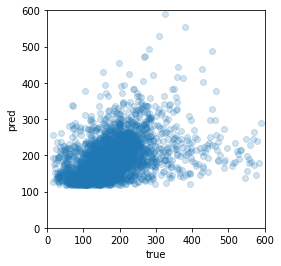

In [451]:
plt.scatter(y_dev, pred_dev, alpha = 0.2)
plt.axis('square')
plt.xlabel("true")
plt.ylabel("pred")

plt.xlim(0,600)
plt.ylim(0,600)

#plt.xlim(0,100)
#plt.ylim(0,100)

#plt.xlim(-0.1,2)
#plt.ylim(-0.1,2)


In [452]:
# --> ALLEIN die Textlänge macht 0.49 bei avgTimeOnPagePerWordcount, das ist eindeutig nicht Sinn der Normierung! :D


## simple baseline for avgTimeOnPage: 240 words per minute

In [453]:
X_dev # if just nr_tokens_text is used

array([[679],
       [731],
       [325],
       ...,
       [478],
       [314],
       [109]])

In [454]:
pred_dev = X_dev.squeeze() / 240 * 60

In [455]:
pred_dev

array([169.75, 182.75,  81.25, ..., 119.5 ,  78.5 ,  27.25])

In [456]:
y_dev

array([132.10204082, 194.88571429, 143.15942029, ..., 292.69784173,
       159.07575758,  72.36      ])

In [457]:
st.pearsonr(pred_dev, y_dev)

(0.40678843787261665, 2.2149332394227972e-141)

## mean values for each category

In [458]:
full = utils.get_raw_df()
NOZ = full[full.publisher == "NOZ"]

Shared columns: {'avgTimeOnPagePerWordcount_percentile', 'dpaGuid', 'date', 'nr_tokens_publisher', 'prozentDpa', 'pageviews_percentile', 'pageviews', 'avgTimeOnPage_percentile', 'avgTimeOnPage', 'rubric', 'exits', 'titel', 'bounces', 'zeilen', 'teaser', 'publisher', 'entrances', 'pagePath', 'timeOnPage', 'prozentVerlag', 'category', 'article_text', 'avgTimeOnPagePerWordcount', 'nr_tokens_text'}
Shape of raw df: (90139, 24)


In [459]:
NOZ.head()

,avgTimeOnPagePerWordcount_percentile,dpaGuid,date,nr_tokens_publisher,prozentDpa,pageviews_percentile,pageviews,avgTimeOnPage_percentile,avgTimeOnPage,rubric,...,teaser,publisher,entrances,pagePath,timeOnPage,prozentVerlag,category,article_text,avgTimeOnPagePerWordcount,nr_tokens_text
articleId,,,,,,,,,,,,,,,,,,,,,
NOZ_1210,91.462140,NaN,NaN,519,NaN,36.193301,271,97.772930,510.305085,papenburg,...,Papenburg. Gewöhnlich landen alte Zeitungen im...,NOZ,227,NaN,30108.0,NaN,lokales,8000 Quadratmeter voller Ideen: Mauer aus 3000...,0.983247,519
NOZ_1248,73.041087,NaN,NaN,955,NaN,53.417871,445,98.081993,551.532609,meppen,...,Meppen. Es ist fast zu schön im Meppener Fried...,NOZ,356,NaN,50741.0,NaN,lokales,Letzte Ruhe unter Bäumen: Stiller Boom im Mepp...,0.577521,955
NOZ_2250,98.652395,NaN,NaN,553,NaN,73.921689,1065,99.543223,1017.269231,osnabrueck,...,Osnabrück. Mit nervtötenden Kreischtönen aus e...,NOZ,980,NaN,105796.0,NaN,lokales,Kreischmaschine sichergestellt: Osnabrück: Ult...,1.839547,553
NOZ_2630,68.818744,NaN,NaN,572,NaN,36.041042,270,92.664303,305.036364,bramsche,...,Hesepe. Die Reihen lichten sich: Die Erdbeersa...,NOZ,209,NaN,16777.0,NaN,lokales,Ende der Woche ist Schluss: Saisonfinale auf d...,0.533280,572
NOZ_2750,47.938824,NaN,NaN,1323,NaN,73.595582,1046,97.820653,514.304348,osnabrueck,...,"Osnabrück. Rasenmähen am frühen Morgen, Plansc...",NOZ,846,NaN,82803.0,NaN,lokales,"Rasenmähen, Grillen, Planschen: Knigge-Ratgebe...",0.388741,1323


In [460]:
print(NOZ.rubric.value_counts().head(20))
print(len(NOZ.rubric.value_counts()))

www.noz.de                   7341
osnabrueck                   3098
vermischtes                  2141
politik                      1692
melle                        1305
lingen                       1296
niedersachsen                1232
papenburg                    1187
delmenhorst                  1169
meppen                       1106
bramsche                      889
samtgemeinde-bersenbrueck     718
gut-zu-wissen                 654
wirtschaft                    631
ganderkesee                   534
bad-essen                     524
medien                        519
samtgemeinde-fuerstenau       460
samtgemeinde-artland          401
georgsmarienhuette            398
Name: rubric, dtype: int64
95


In [473]:
NOZ.category.value_counts().keys()

Index(['lokales', 'deutschland-und-welt', 'sport', 'archiv', 'angebote',
       'gut-zu-wissen', 'rubrikenmarkt', 'regionalsport',
       'deutschlaking comd-welt', 'leo-award. okales', 'emsland', 'nozkompakt',
       'deuts"es braeuchte ein handy-trage-gebot fuer die corona-app" hland-welt',
       'region-osnabrueck', 'medien', 'fussball'],
      dtype='object')

In [530]:
def get_category_mean(df, columns):
    categories = df.category.value_counts().keys()[:8] # just top 8
    category_mean = collections.defaultdict(dict)
    for c in categories:
        tmp = df[df.category == c]
        if len(tmp) > 0:
            for col in columns:
                mean = np.mean(tmp[col]).round(3)
                category_mean[c][col] = mean
            category_mean[c]["count"] = len(tmp)
    return category_mean

def get_rubric_mean(df, columns):
    rubrics = df.rubric.value_counts().keys()[:20] # just top 12
    rubric_mean = collections.defaultdict(dict)
    for r in rubrics:
        tmp = df[df.rubric == r]
        if len(tmp) > 0:
            for col in columns:
                mean = np.mean(tmp[col]).round(3)
                rubric_mean[r][col] = mean
            rubric_mean[r]["count"] = len(tmp)
    return rubric_mean

In [531]:
col_list = ['pageviews', 'exits', 'nr_tokens_text', 
            'timeOnPage', 'avgTimeOnPage', 'avgTimeOnPagePerWordcount']


In [532]:
get_category_mean(df = NOZ, columns = col_list)

pd.DataFrame.from_dict(get_category_mean(df = NOZ, columns = col_list), orient='index')

,pageviews,exits,nr_tokens_text,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,count
lokales,915.073,627.113,440.908,50944.646,178.525,0.520,19196
deutschland-und-welt,1735.886,1333.582,472.288,84405.748,223.536,0.609,7606
sport,738.909,425.198,513.251,61516.601,186.889,0.442,2033
archiv,1143.373,1016.716,497.657,79057.776,576.693,1.318,67
angebote,5265.286,3718.333,613.429,290440.190,214.650,0.458,21
gut-zu-wissen,595.125,424.125,630.875,28733.500,173.377,0.333,8
rubrikenmarkt,2172.200,1989.800,431.200,44189.800,358.668,0.831,5
regionalsport,170.000,63.000,839.000,22351.000,208.888,0.249,1


In [533]:
get_rubric_mean(df = NOZ, columns = col_list)

pd.DataFrame.from_dict(get_rubric_mean(df = NOZ, columns = col_list), orient='index')

,pageviews,exits,nr_tokens_text,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,count
www.noz.de,1978.107,1291.483,491.719,112707.015,161.851,0.434,7341
osnabrueck,1543.281,981.429,508.072,103036.128,208.597,0.534,3098
vermischtes,1637.711,1215.234,398.523,73003.649,197.143,0.612,2141
politik,789.051,510.614,492.969,50358.267,182.038,0.450,1692
melle,661.956,456.545,429.720,34198.116,166.834,0.460,1305
lingen,720.654,507.181,440.340,38851.867,178.774,0.512,1296
niedersachsen,1971.219,1467.045,355.468,92318.383,177.030,0.766,1232
papenburg,1397.874,1039.912,420.303,63376.324,166.862,0.537,1187
delmenhorst,881.343,677.916,394.563,34549.389,166.055,0.598,1169
meppen,1489.732,1103.388,431.862,69570.136,178.750,0.528,1106


In [266]:
# Achtung: ein Artikel hat mehrere Subjects, daher addiert sich das unten nicht auf die Gesamtzahl
# außerdem: manche haben kein Subject (oder jedenfalls keines der hier betrachteten)

In [267]:
subject_meta = pd.read_csv(utils.OUTPUT / 'subject_meta.tsv', sep = "\t", index_col = "articleId")

In [268]:
subject_meta

,Automobilindustrie,Bundesregierung,EU,Fernsehen,Film,Finanzen,Formel 1,Fußball,Gesellschaft,Gesundheit,...,Medien,Motorsport,Musik,Partei,Prozess (Gericht),Regierung,Tourismus,Verbraucher,Verkehr,Wissenschaft
articleId,,,,,,,,,,,,,,,,,,,,,
49297055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49307861,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49307973,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
49308023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49308055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53516443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53516491,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53516929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
for s in list(subject_meta.columns):
    print(s, subject_meta[s].sum())

Automobilindustrie 1757
Bundesregierung 1575
EU 1753
Fernsehen 2000
Film 2324
Finanzen 1521
Formel 1 1673
Fußball 21529
Gesellschaft 2506
Gesundheit 24804
Internet 2059
Konjunktur 1834
Krankheit 23791
Kriminalität 3622
Leute 6984
Medien 2849
Motorsport 2113
Musik 2659
Partei 1890
Prozess (Gericht) 1483
Regierung 2319
Tourismus 2582
Verbraucher 1551
Verkehr 2778
Wissenschaft 7704


In [270]:
subjects = subject_meta.columns
print(subjects)

Index(['Automobilindustrie', 'Bundesregierung', 'EU', 'Fernsehen', 'Film',
       'Finanzen', 'Formel 1', 'Fußball', 'Gesellschaft', 'Gesundheit',
       'Internet', 'Konjunktur', 'Krankheit', 'Kriminalität', 'Leute',
       'Medien', 'Motorsport', 'Musik', 'Partei', 'Prozess (Gericht)',
       'Regierung', 'Tourismus', 'Verbraucher', 'Verkehr', 'Wissenschaft'],
      dtype='object')


In [271]:
def get_subject_mean(df, columns):
    subject_mean = collections.defaultdict(dict)
    for sub in subjects:
        ids = subject_meta[subject_meta[sub] == 1].index # take the ones where sub == 1
        ids = [ ID for ID in ids if ID in df.index ]
        tmp = df.loc[ids]
        if len(tmp) > 0:
            for col in columns:
                mean = np.mean(tmp[col]).round(3)
                subject_mean[sub][col] = mean
            subject_mean[sub]["count"] = len(tmp)
    return subject_mean

In [272]:
df.set_index('articleId', inplace=True)

In [273]:
col_list = ['pageviews', 'nr_tokens_publisher', 'zeilen', 'avgTimeOnPage', 'avgTimeOnPagePerWordcount', 'stickiness']

pd.DataFrame.from_dict(get_subject_mean(df = df, columns = col_list), orient='index')

,pageviews,nr_tokens_publisher,zeilen,avgTimeOnPage,avgTimeOnPagePerWordcount,stickiness,count
Automobilindustrie,2593.300,369.300,41.225,120.995,0.604,47.207,40
Bundesregierung,2911.255,425.574,50.723,122.222,0.514,43.948,94
EU,731.500,424.475,57.550,137.104,2.677,44.347,40
Fernsehen,895.702,394.895,41.053,145.196,0.546,50.597,57
Film,574.667,368.909,41.727,127.042,0.544,46.567,33
Finanzen,2380.842,421.105,48.632,129.868,0.417,46.085,38
Formel 1,193.900,486.900,56.800,145.777,0.432,65.296,10
Fußball,669.426,398.893,44.548,127.399,0.554,50.852,197
Gesellschaft,1314.902,416.044,48.295,139.398,0.535,46.878,183
Gesundheit,3587.572,394.746,45.455,131.080,0.627,44.750,1403


In [274]:
pd.DataFrame.from_dict(get_subject_mean(df = full, columns = col_list), orient='index')

,pageviews,nr_tokens_publisher,zeilen,avgTimeOnPage,avgTimeOnPagePerWordcount,stickiness,count
Automobilindustrie,1403.300,164.133,49.900,114.123,inf,49.243,90
Bundesregierung,2587.548,119.772,58.332,118.114,inf,48.319,334
EU,659.207,94.855,61.877,129.342,inf,50.432,179
Fernsehen,966.897,121.670,38.686,126.944,inf,52.516,185
Film,499.758,122.970,36.242,110.602,inf,52.212,99
Finanzen,1259.109,145.473,59.509,130.885,inf,48.865,110
Formel 1,176.581,157.065,61.387,142.478,inf,63.196,31
Fußball,530.503,176.589,50.204,124.563,inf,55.131,445
Gesellschaft,951.420,213.266,54.527,131.891,inf,50.422,357
Gesundheit,2282.922,136.243,50.663,124.182,inf,50.158,4065


In [21]:
categories

['vm', 'pl', 'ku', 'wi', 'sp', 'rs']

Bedeutung der Ressortkürzel:\
pl : Politik\
wi : Wirtschaft\
ku : Kultur\
sp : Sport\
vm : Vermischtes\
rs : Redaktioneller Service, wie Kurzdienst, Hinweise, etc.

In [534]:
NOZ_raw = utils.get_publisher_df("NOZ")

Shape of df: (36383, 28)


In [535]:
NOZ_raw.columns

Index(['pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage', 'category',
       'rubric', 'title', 'date', 'titel', 'prozentDpa', 'prozentVerlag',
       'zeilen', 'pagePath', 'dpaGuid', 'article_text', 'titel_html',
       'other_content', 'teaser', 'avgTimeOnPage', 'nr_tokens_text',
       'avgTimeOnPagePerWordcount', 'avgTimeOnPage_percentile',
       'pageviews_percentile', 'avgTimeOnPagePerWordcount_percentile',
       'article_body', 'publisher', 'nr_tokens_publisher'],
      dtype='object')